# Data Collection

### Import necessary libraries


In [2]:
import pandas as pd
import numpy as np

### Load the dataset


In [3]:
df = pd.read_csv('Electric Vehicle Sales by State in India.csv')

### Display the first few rows of the dataset


In [4]:
print(df.head())

     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  


# Data Preprocessing

### Convert 'Date' column to datetime format

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

### Check for missing values

In [6]:
print(df.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


### Fill missing values (if any) using median for numerical columns or mode for categorical columns

In [7]:
df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

C:\Users\singh\AppData\Local\Temp\ipykernel_10744\3951123138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EV_Sales_Quantity'].fillna(df['EV_Sales_Quantity'].median(), inplace=True)


# Exploratory Data Analysis (EDA)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### Plot EV sales over the years

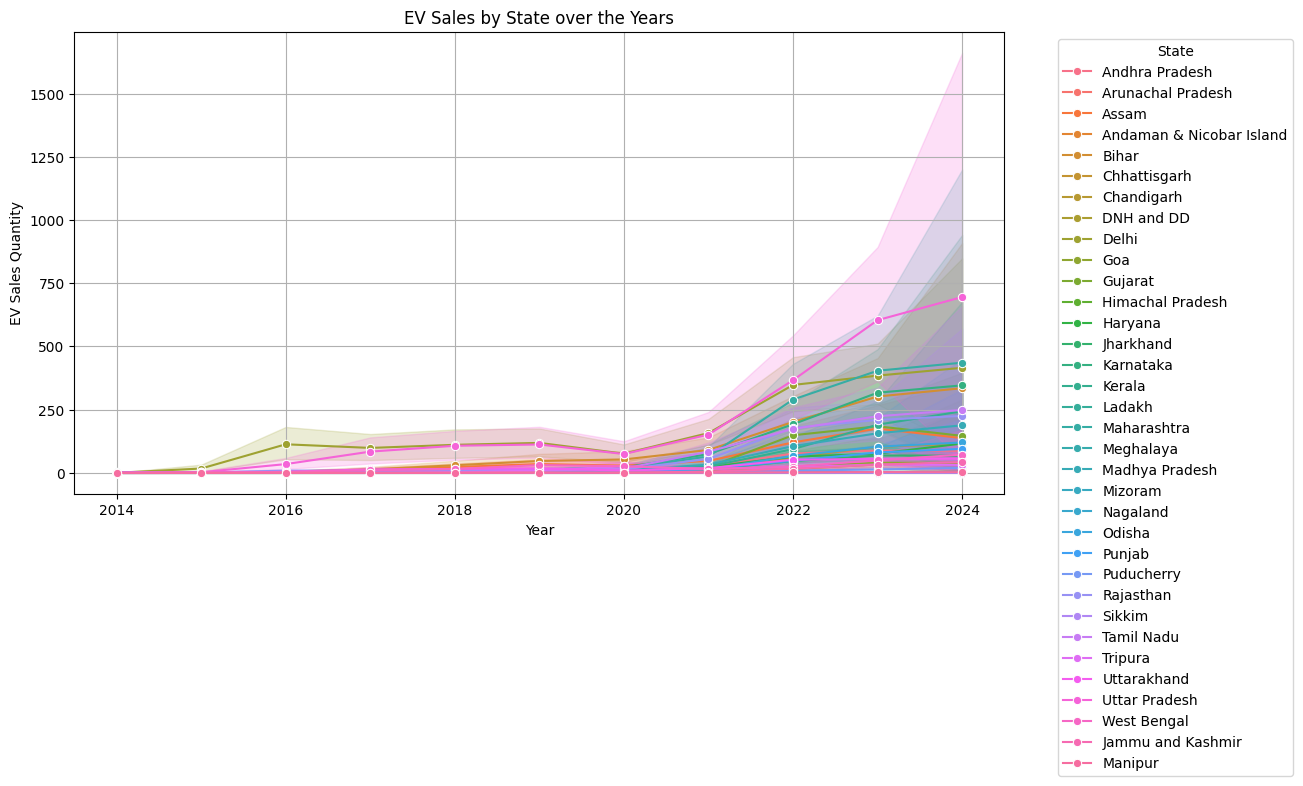

In [28]:
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity', hue='State',marker = 'o')
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.title("EV Sales by State over the Years")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Plot sales by vehicle category

C:\Users\singh\AppData\Local\Temp\ipykernel_16524\3720495882.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df, errorbar=None, palette='viridis')


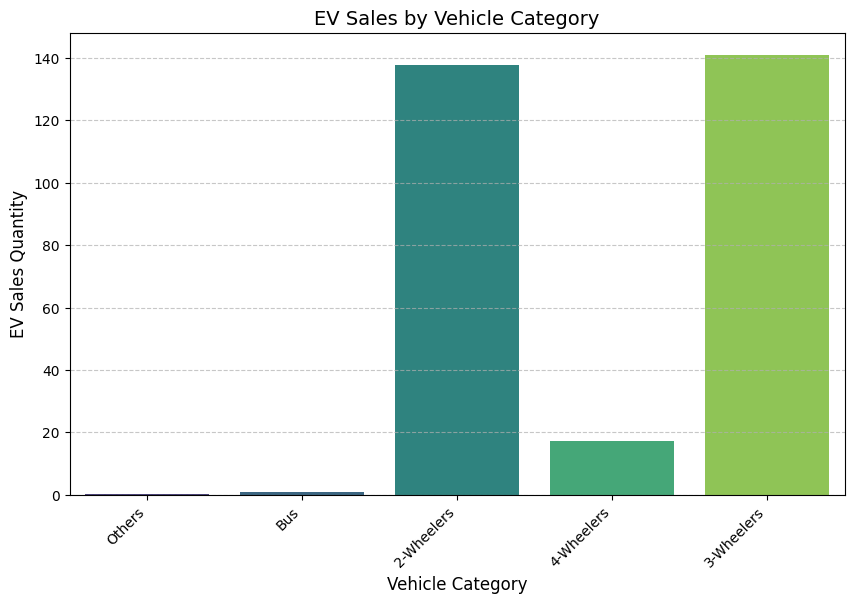

In [29]:
# Ensure data types are correct
df['EV_Sales_Quantity'] = pd.to_numeric(df['EV_Sales_Quantity'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df, errorbar=None, palette='viridis')

# Add labels & formatting
plt.title('EV Sales by Vehicle Category', fontsize=14)
plt.xlabel('Vehicle Category', fontsize=12)
plt.ylabel('EV Sales Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light gridlines

plt.show()

# Feature Engineering
### Extract Month and Day from the Date column


In [9]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

### Encode categorical variables using one-hot encoding

In [10]:
df_encoded = pd.get_dummies(df, columns=['State','Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'],drop_first=True)

### Drop unnecessary columns like Date, Month_Name (if already extracted into numerical values)

In [11]:
df_encoded.drop(['Date', 'Month_Name'], axis=1, inplace=True)

# Modeling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Split the data into features and target variable

In [13]:
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

### Split the dataset into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### Instantiate the model

In [15]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 130.58175227721011


# Model Evaluation
### Plot actual vs predicted sales

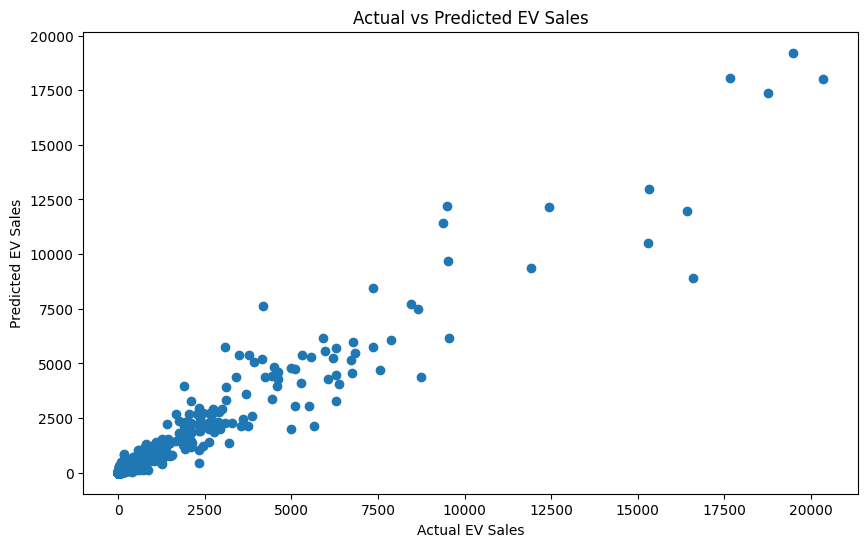

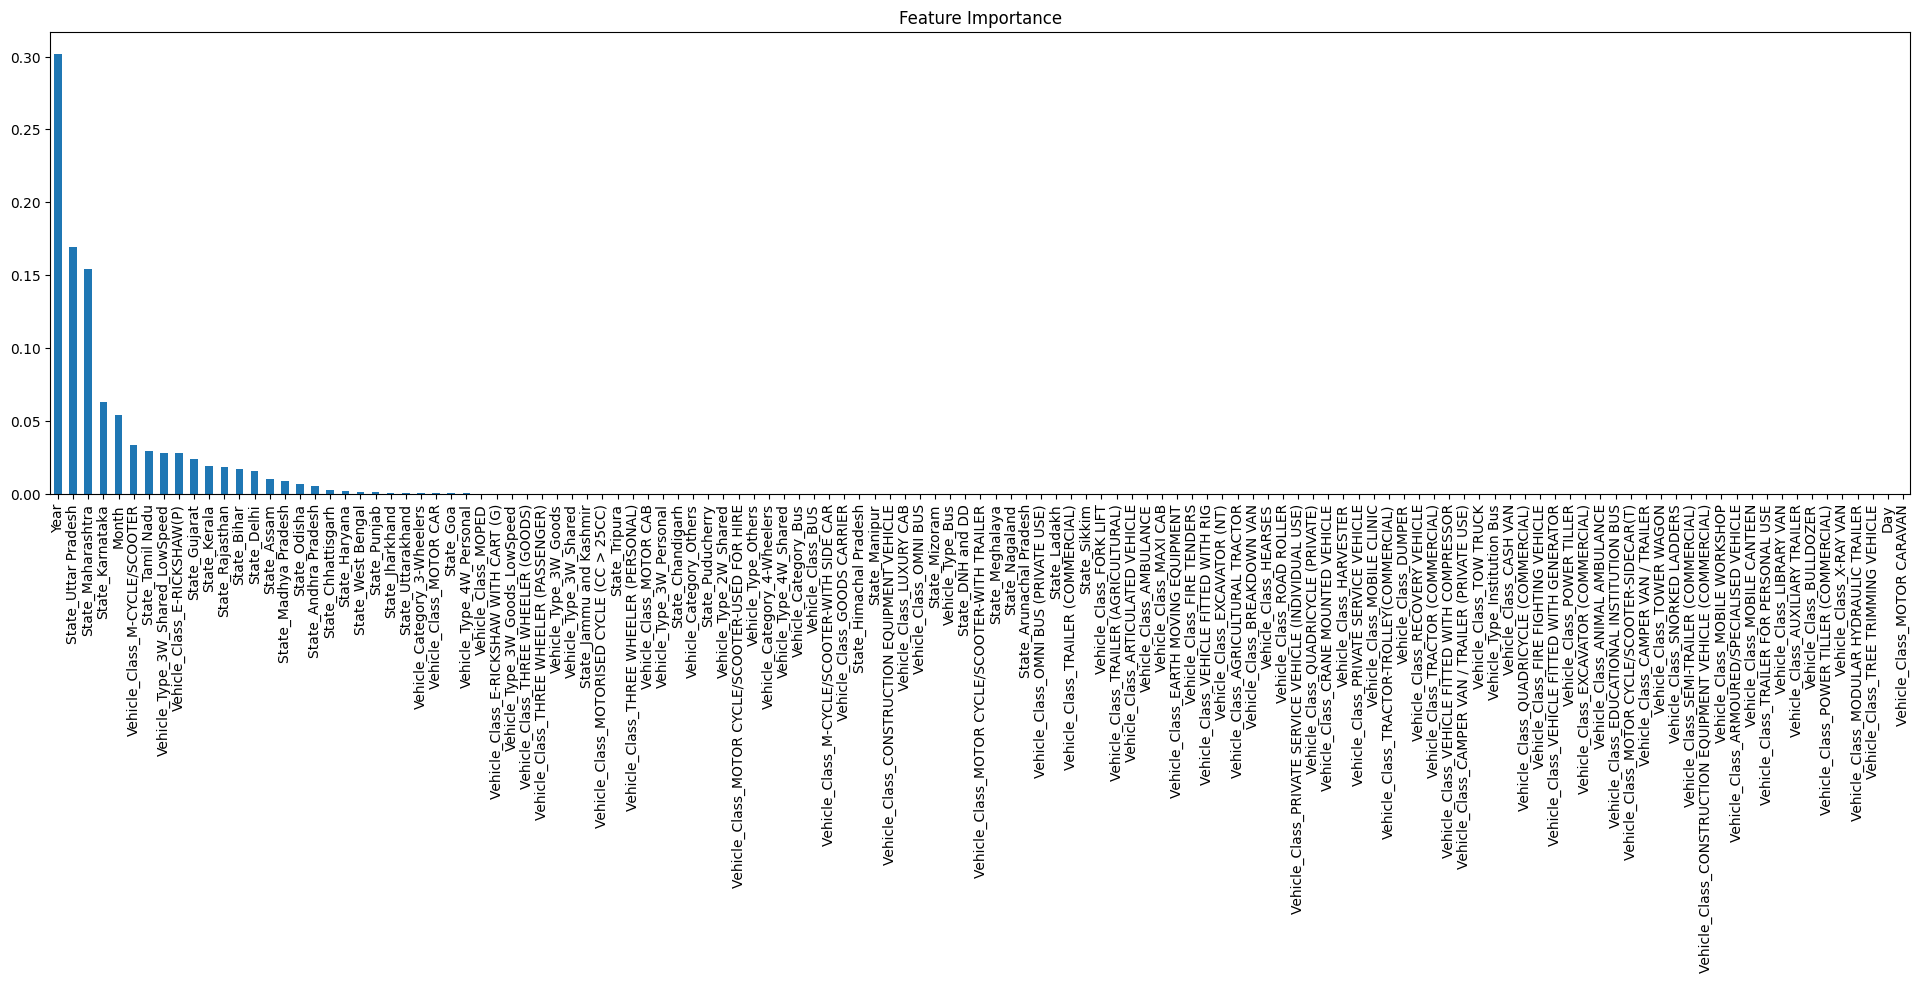

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()
# Check feature importance
importance = model.feature_importances_
feature_importance = pd.Series(importance,
index=X_train.columns).sort_values(ascending=False)
# Plot the most important features
plt.figure(figsize=(24, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

### Yearly Analysis

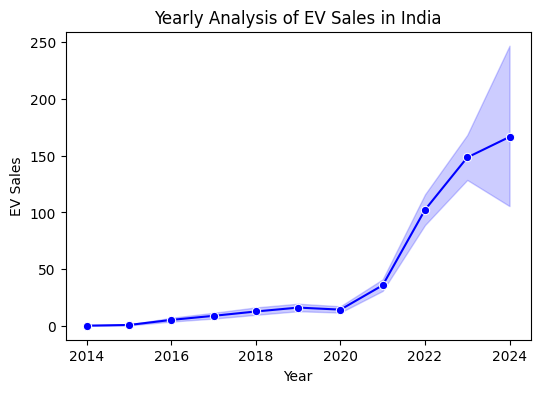

In [40]:
plt.figure(figsize=(6,4))
plt.title('Yearly Analysis of EV Sales in India')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df,
marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('EV Sales')

### Monthly Analysis of EV Sales

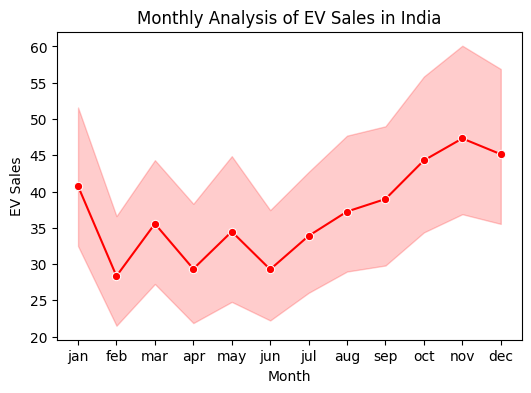

In [41]:
plt.figure(figsize=(6,4))
plt.title('Monthly Analysis of EV Sales in India')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df,marker='o', color='r')
plt.xlabel('Month')
plt.ylabel('EV Sales')

### State-Wise Analysis 

Text(0, 0.5, 'EV Sales')

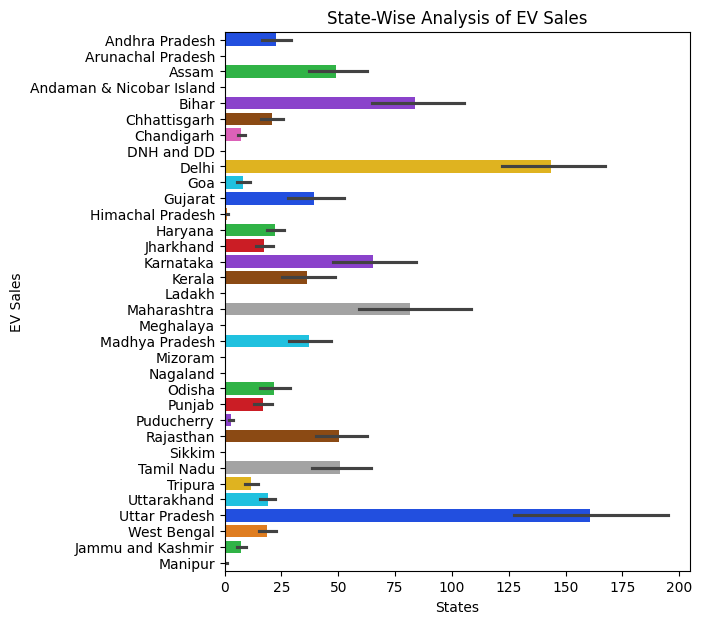

In [42]:
plt.figure(figsize=(6,7))
plt.title('State-Wise Analysis of EV Sales')
sns.barplot(y='State', x='EV_Sales_Quantity', data=df,hue='State', palette='bright')
plt.xlabel('States')
plt.ylabel('EV Sales')

### Analysis By Vehicle Class

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72],
 [Text(0, 0, 'ADAPTED VEHICLE'),
  Text(1, 0, 'AGRICULTURAL TRACTOR'),
  Text(2, 0, 'AMBULANCE'),
  Text(3, 0, 'ARTICULATED VEHICLE'),
  Text(4, 0, 'BUS'),
  Text(5, 0, 'CASH VAN'),
  Text(6, 0, 'CRANE MOUNTED VEHICLE'),
  Text(7, 0, 'EDUCATIONAL INSTITUTION BUS'),
  Text(8, 0, 'EXCAVATOR (COMMERCIAL)'),
  Text(9, 0, 'FORK LIFT'),
  Text(10, 0, 'GOODS CARRIER'),
  Text(11, 0, 'HARVESTER'),
  Text(12, 0, 'MAXI CAB'),
  Text(13, 0, 'M-CYCLE/SCOOTER'),
  Text(14, 0, 'MOTOR CAB'),
  Text(15, 0, 'MOTOR CAR'),
  Text(16, 0, 'OMNI BUS'),
  Text(17, 0, 'PRIVATE SERVICE VEH

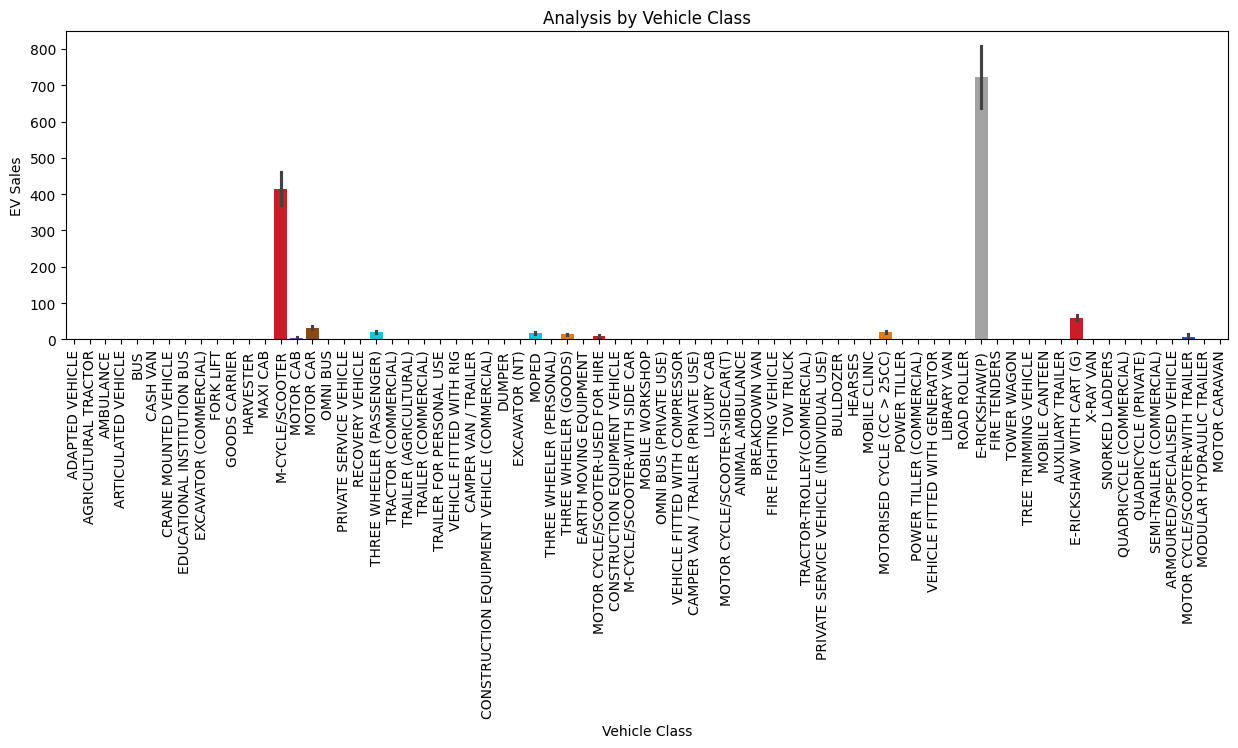

In [43]:
plt.figure(figsize=(15,4))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity',data=df,hue='Vehicle_Class', palette='bright')
plt.title('Analysis by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('EV Sales')
plt.xticks(rotation=90)

### Analysis By Vehicle Category

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Bus'),
  Text(2, 0, '2-Wheelers'),
  Text(3, 0, '4-Wheelers'),
  Text(4, 0, '3-Wheelers')])

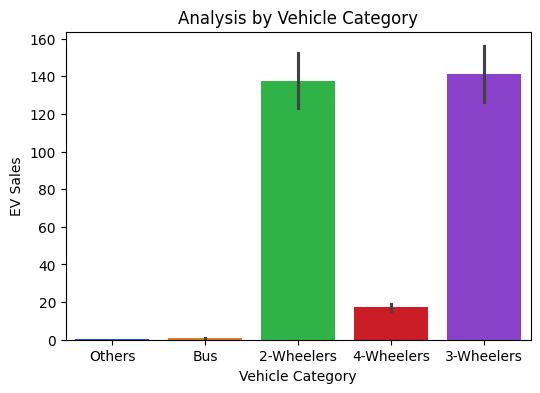

In [44]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Category',y='EV_Sales_Quantity',data=df, hue='Vehicle_Category',palette='bright')
plt.title('Analysis by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.xticks(rotation=0)

### Analysis By Vehicle Type

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Bus'),
  Text(2, 0, 'Institution Bus'),
  Text(3, 0, '2W_Personal'),
  Text(4, 0, '4W_Shared'),
  Text(5, 0, '4W_Personal'),
  Text(6, 0, '3W_Shared'),
  Text(7, 0, '3W_Personal'),
  Text(8, 0, '3W_Goods'),
  Text(9, 0, '2W_Shared'),
  Text(10, 0, '3W_Shared_LowSpeed'),
  Text(11, 0, '3W_Goods_LowSpeed')])

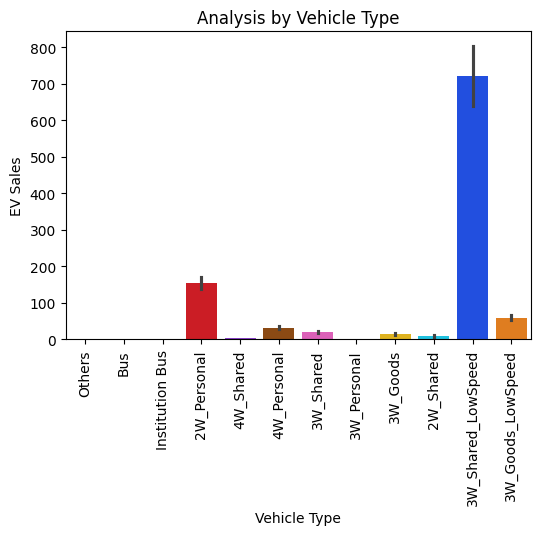

In [45]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity',data=df,hue='Vehicle_Type', palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90)

# End